# Features

1.age: Age of the patient

2.sex: Sex of the patient

3.cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

4.trtbps: Resting blood pressure (in mm Hg)

5.chol: Cholestoral in mg/dl fetched via BMI sensor

6.fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

7.restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

8.thalach: Maximum heart rate achieved

9.oldpeak: Previous peak

10.slp: Slope

11.caa: Number of major vessels

12.thall: Thalium Stress Test result, (0-3)

13.exng: Exercise induced angina, 1 = Yes, 0 = No

14.target: 0 = less chance of heart attack, 1 = more chance of heart attack

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("heart.csv")

In [4]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True) 
data.reset_index(drop=True, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

Age

<AxesSubplot:xlabel='age', ylabel='Count'>

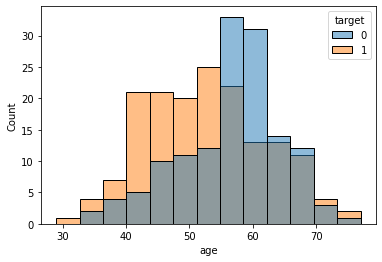

In [11]:
sn.histplot(x=data['age'],hue=data['target'])

<AxesSubplot:xlabel='target', ylabel='age'>

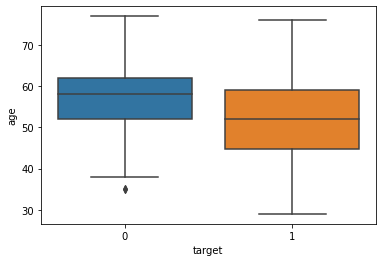

In [12]:
sn.boxplot(x=data['target'],y=data['age'])

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

<AxesSubplot:xlabel='cp', ylabel='count'>

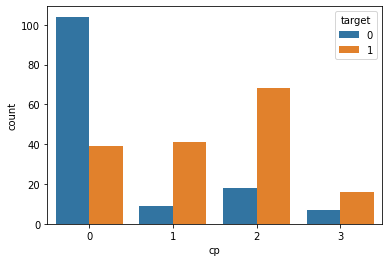

In [13]:
sn.countplot(x=data['cp'],hue=data['target'])

sex(1=male, 0=female)

<AxesSubplot:xlabel='sex', ylabel='count'>

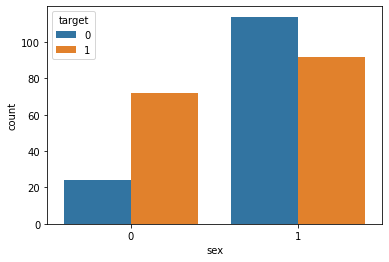

In [14]:
sn.countplot(x=data['sex'],hue=data['target'])

trestbps

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

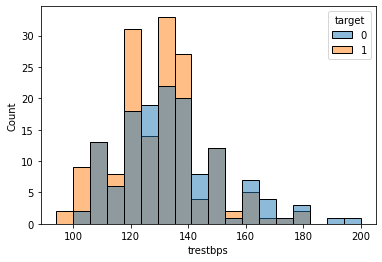

In [15]:
sn.histplot(x=data['trestbps'],hue=data['target'])

<AxesSubplot:xlabel='target', ylabel='trestbps'>

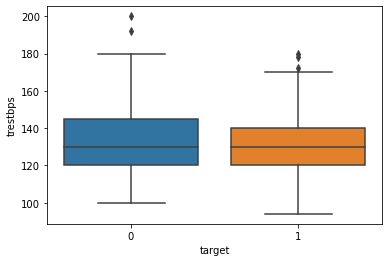

In [16]:
sn.boxplot(x=data['target'],y=data['trestbps'])

chol: Cholestoral in mg/dl fetched via BMI sensor

<AxesSubplot:xlabel='chol', ylabel='Count'>

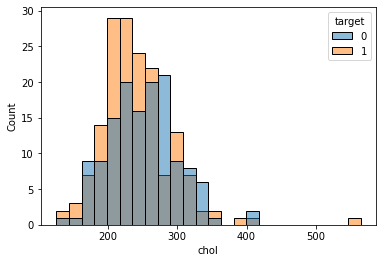

In [17]:
sn.histplot(x=data['chol'],hue=data['target'])

<AxesSubplot:xlabel='target', ylabel='chol'>

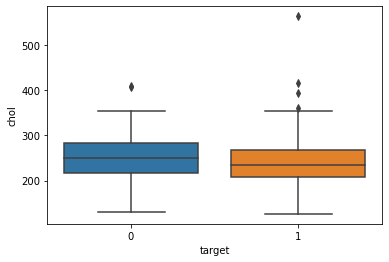

In [18]:
sn.boxplot(x=data['target'],y=data['chol'])

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

<AxesSubplot:xlabel='fbs', ylabel='count'>

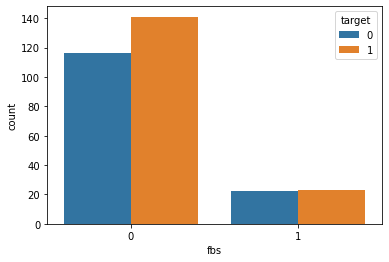

In [19]:
sn.countplot(x=data['fbs'],hue=data['target'])

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

<AxesSubplot:xlabel='restecg', ylabel='count'>

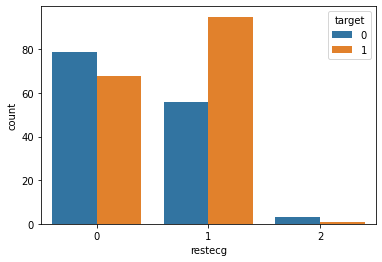

In [20]:
sn.countplot(x=data['restecg'],hue=data['target'])

thalach: Maximum heart rate achieved

<AxesSubplot:xlabel='thalach', ylabel='Count'>

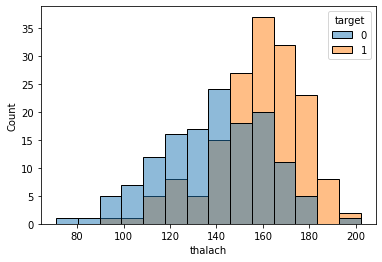

In [21]:
sn.histplot(x=data['thalach'],hue=data['target'])

<AxesSubplot:xlabel='target', ylabel='thalach'>

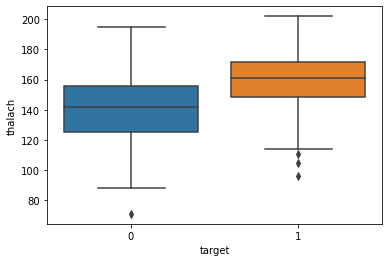

In [22]:
sn.boxplot(y=data['thalach'],x=data['target'])

oldpeak: Previous peak

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

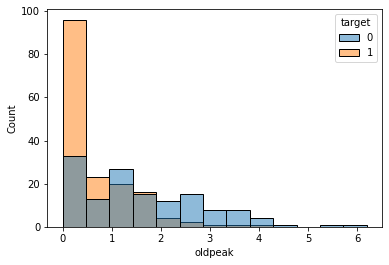

In [23]:
sn.histplot(x=data['oldpeak'],hue=data['target'])

<AxesSubplot:xlabel='target', ylabel='thalach'>

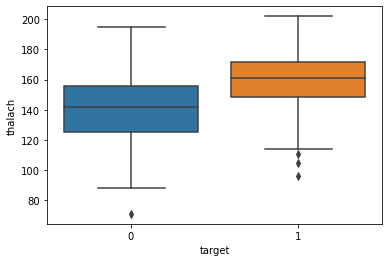

In [24]:
sn.boxplot(y=data['thalach'],x=data['target'])

Slope

<AxesSubplot:xlabel='slope', ylabel='count'>

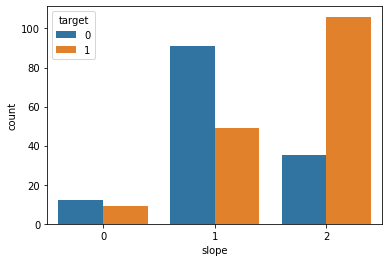

In [25]:
sn.countplot(x=data['slope'],hue=data['target'])

ca: Number of major vessels

<AxesSubplot:xlabel='ca', ylabel='count'>

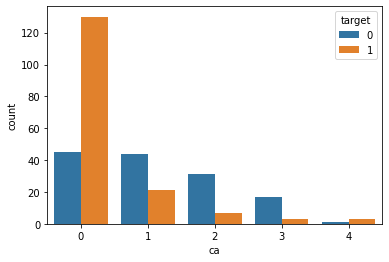

In [26]:
sn.countplot(x=data['ca'],hue=data['target'])

thall: Thalium Stress Test result, (0-3)

<AxesSubplot:xlabel='ca', ylabel='count'>

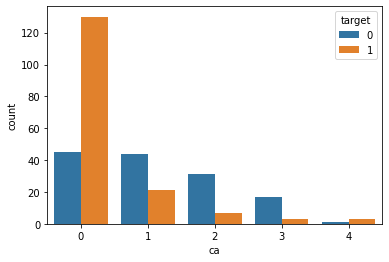

In [27]:
sn.countplot(x=data['ca'],hue=data['target'])

exng: Exercise induced angina, 1 = Yes, 0 = No

<AxesSubplot:xlabel='exang', ylabel='count'>

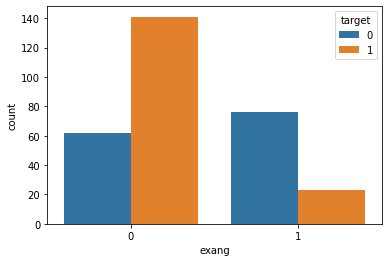

In [28]:
sn.countplot(x=data['exang'],hue=data['target'])

<AxesSubplot:>

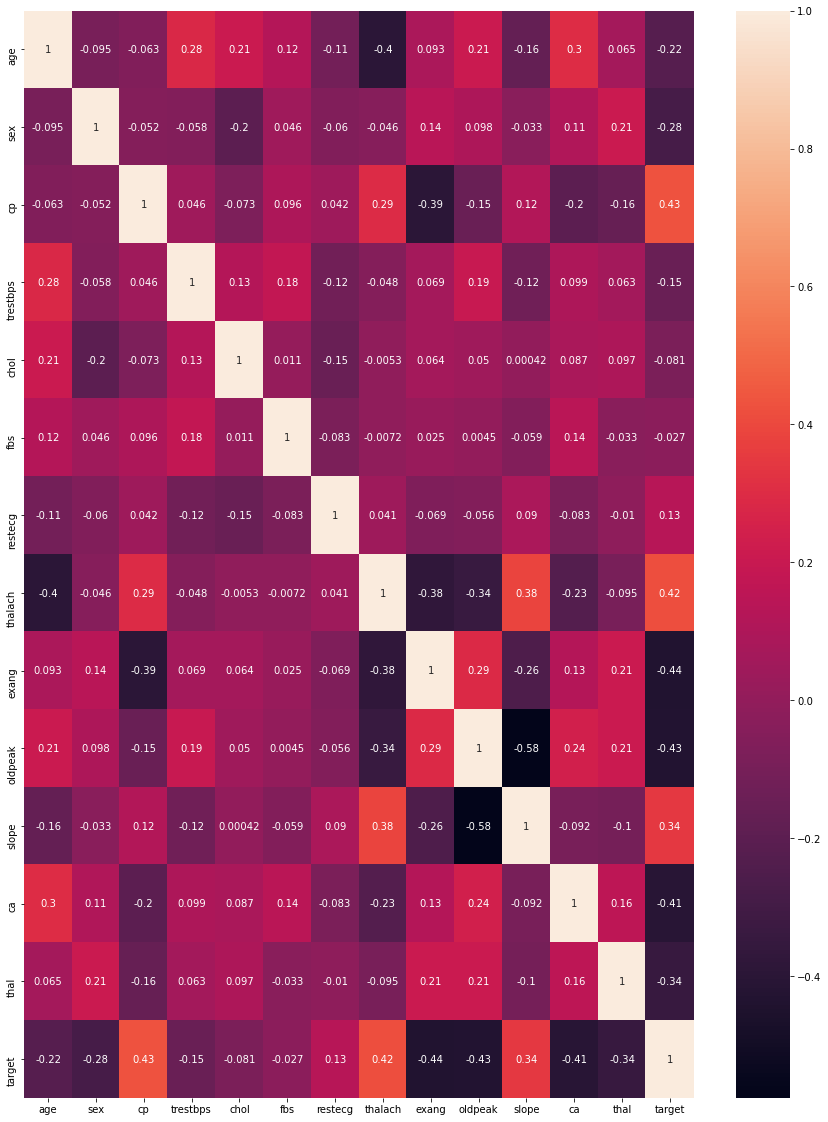

In [29]:
pt.figure(figsize=(15,20))
sn.heatmap(data.corr(),annot=True)

# Observation :

 People with more chances of heartattack:
1. Under the age of 55
2. With atypical angina, non anginal pain and asymptomatic
3. Trestbps under 140
4. With ST-T wave abnormality in resting ecocardiographic result
5. With maximum heart rate nearly more than 145
6. Oldpeak less than 1
7. With slope=2
8. With 0 number of major vessels
8. Thallium test result : 0
9. People exercise induced angina.

# Data Preprocessing

In [30]:
y=data.pop('target')
x=data

In [31]:
x.head(2)
x_copy=x.copy()

In [32]:
y.head(2)

0    1
1    1
Name: target, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns=x_copy.columns)


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [35]:
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((241, 13), (61, 13), (241,), (61,))

# Machine Learning Models

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [37]:
key = ['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier']
value = [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
models = dict(zip(key,value))
print(models)

{'LogisticRegression': LogisticRegression(), 'SVC': SVC(), 'DecisionTreeClassifier': DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier(), 'KNeighborsClassifier': KNeighborsClassifier()}


In [38]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8688524590163934
SVC 0.9344262295081968
DecisionTreeClassifier 0.7868852459016393
RandomForestClassifier 0.8524590163934426
KNeighborsClassifier 0.9180327868852459


<AxesSubplot:>

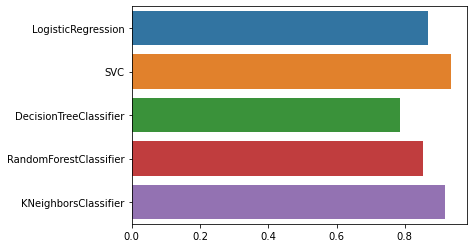

In [39]:
sn.barplot(x=predicted, y=key)

Out of all models SVC has the best performance

# Feature Importance

<AxesSubplot:>

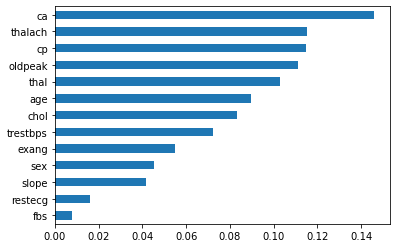

In [40]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
coef=pd.Series(clf.feature_importances_,index=x.columns)
coef=coef.sort_values()
coef.plot(kind='barh')

# Final Model

In [41]:
svc=SVC(probability=True)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [43]:
#accuracy for test case
accuracy_score(y_test,y_pred)

0.9344262295081968

In [44]:
#Accuracy of train set
accuracy_score(y_train,svc.predict(x_train))

0.9087136929460581

<AxesSubplot:>

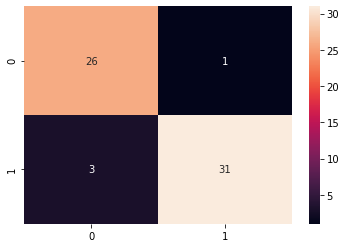

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True)

# Best accuracy: 93.4%